In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypalettes import get_hex
from highlight_text import fig_text, ax_text
from matplotlib.font_manager import FontProperties

df = pd.read_csv('disaster-events.csv')

def remove_agg_rows(entity: str):
   if entity.lower().startswith('all disasters'):
      return False
   else:
      return True
df = df.replace('Dry mass movement', 'Drought')
df = df[df['Entity'].apply(remove_agg_rows)]
df = df[~df['Entity'].isin(['Fog', 'Glacial lake outburst flood'])]
df = df.pivot_table(index='Entity', columns='Year', values='Disasters').T
df.loc[1900, :] = df.loc[1900, :].fillna(0)
df = df[df.index >= 1960]
df = df.interpolate(axis=1)
df.tail()#.sum(axis=1)

Entity,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Volcanic activity,Wet mass movement,Wildfire
Year,,,,,,,,
2020,20.0,16.0,6.0,126.0,206.0,4.0,19.0,10.0
2021,25.0,28.0,3.0,121.0,222.0,9.0,12.0,19.0
2022,40.0,31.0,40.0,109.0,181.0,5.0,17.0,16.0
2023,17.0,32.0,10.0,140.0,166.0,4.0,24.0,16.0
2024,7.0,6.0,2.0,24.0,31.0,1.0,7.0,5.0


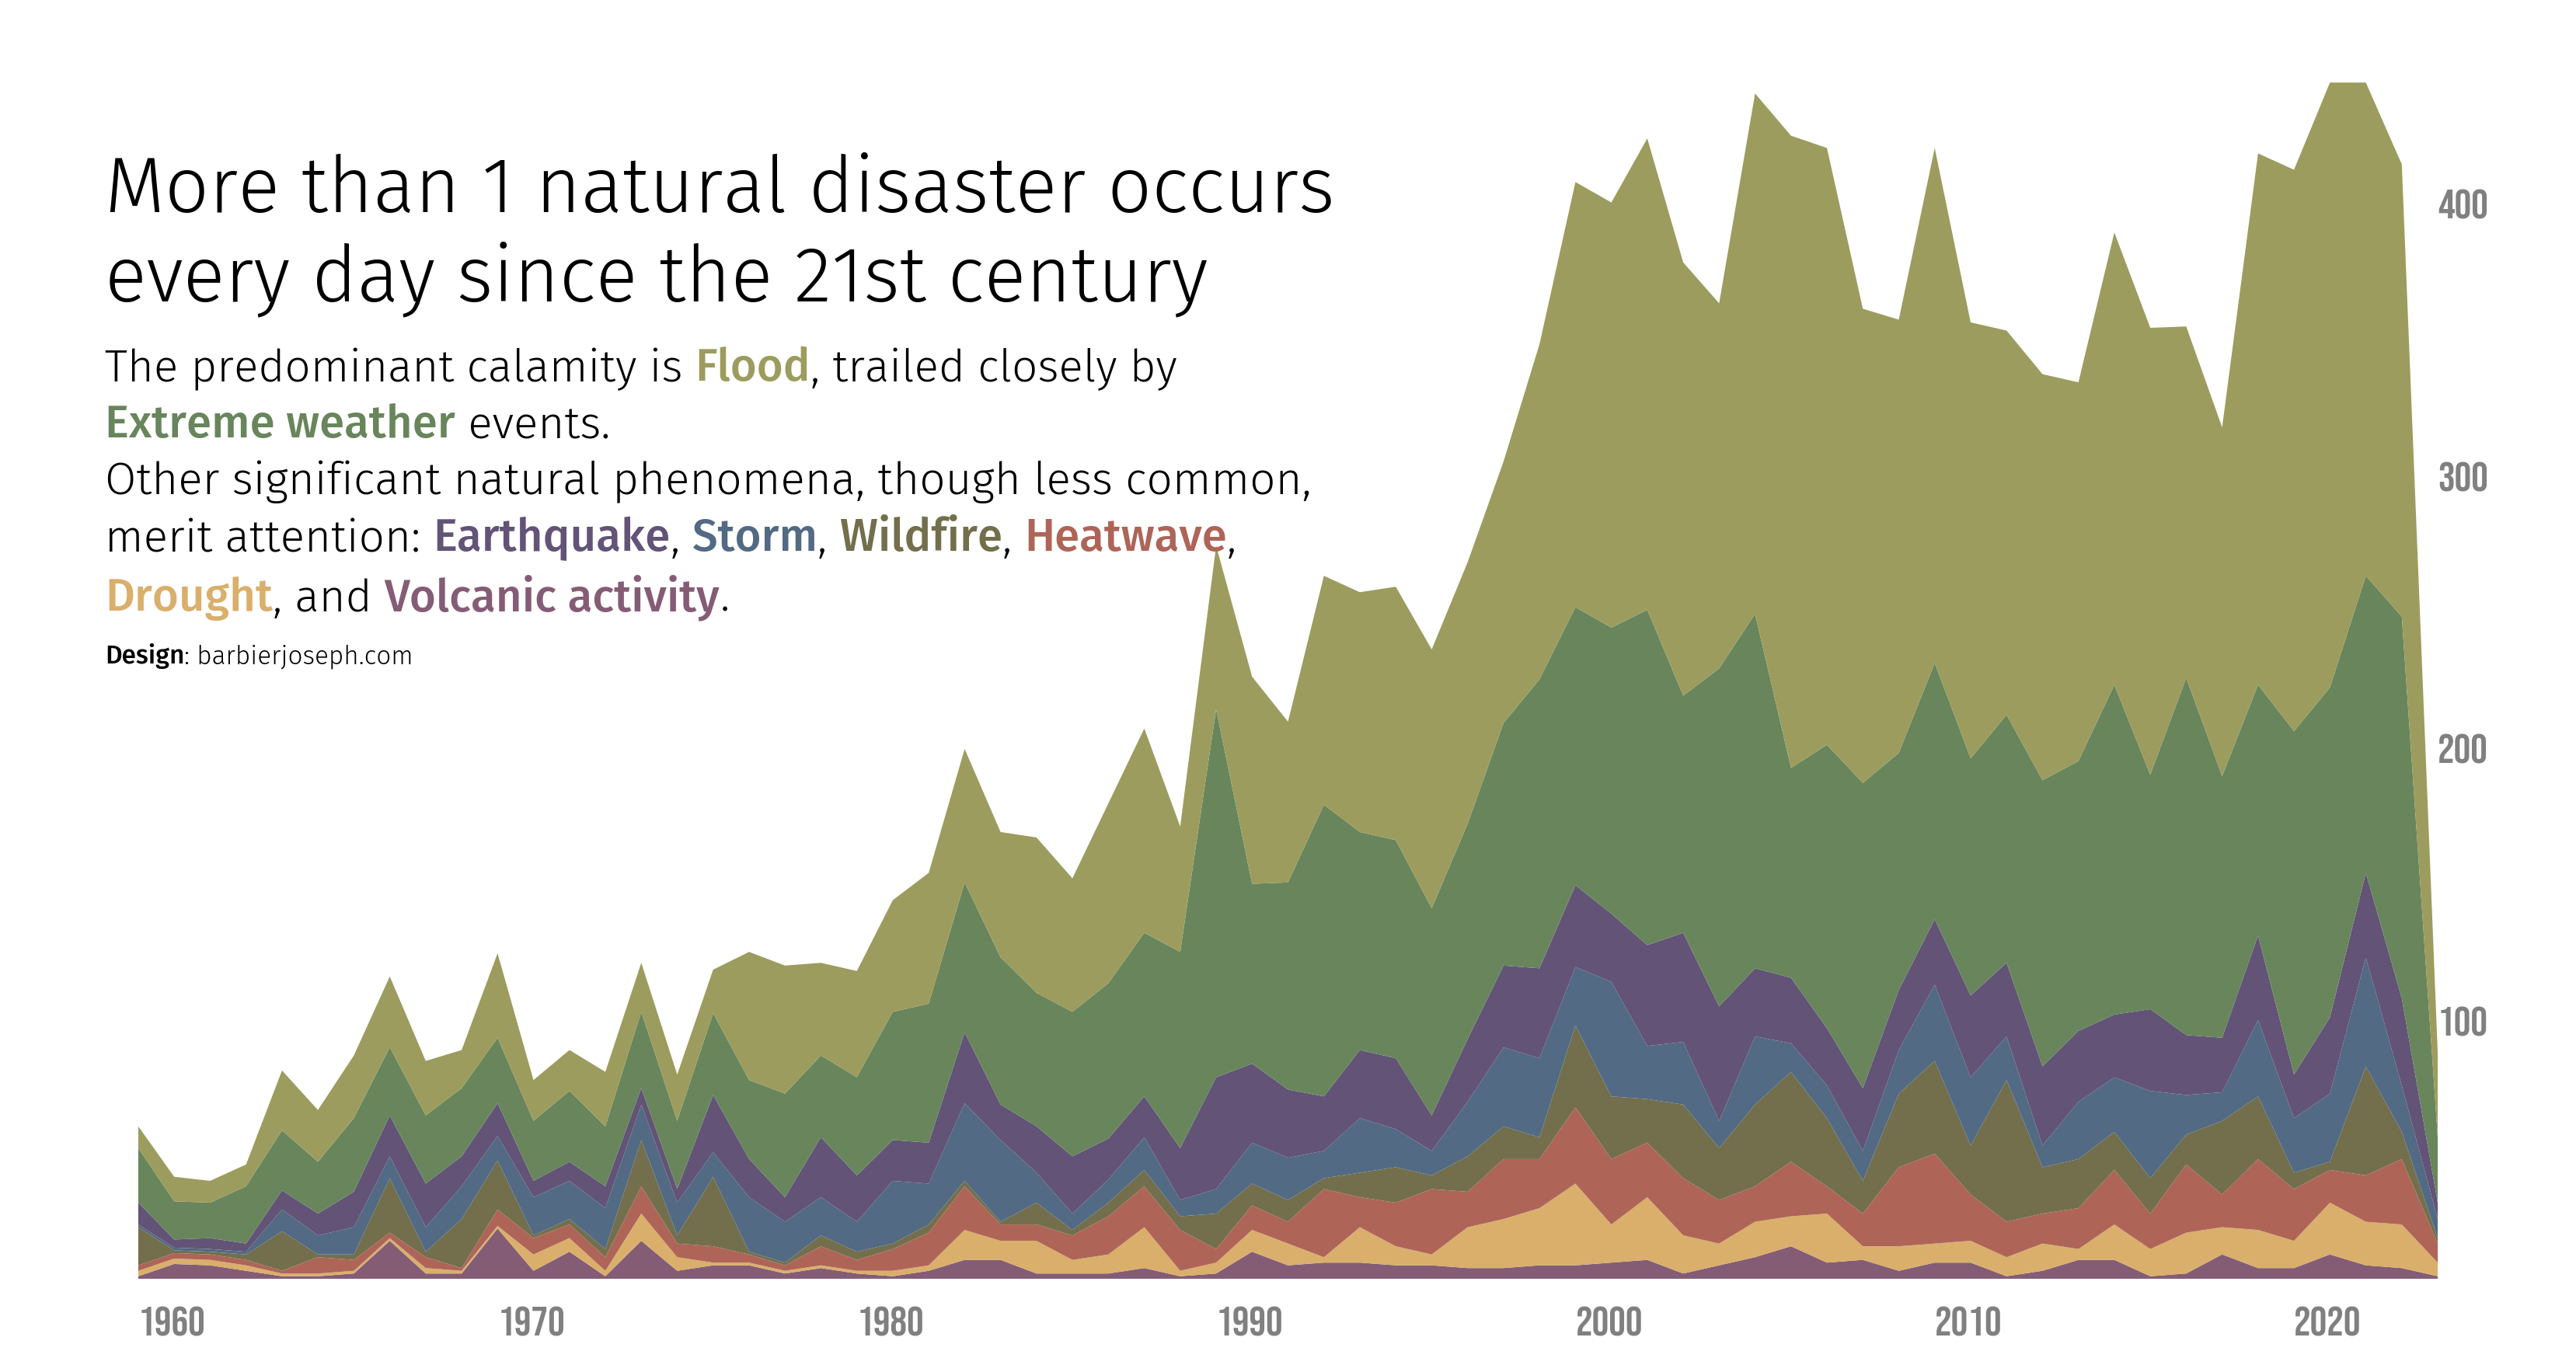

In [172]:
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

columns = df.sum().sort_values().index.to_list()
colors = get_hex('Antique')

x = df.index
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

fig_text(
   s='More than 1 natural disaster occurs\nevery day since the 21st century',
   x=.15, y=.8, fontsize=24, 
   ha='left', va='top', color='black',
   font=other_font, fig=fig
)

for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      font=font, fontsize=13,
      color='grey'
   )

for value in range(100, 500, 100):
   ax_text(
      x=2024, y=value, s=f'{value}',
      va='top', ha='left',
      font=font, fontsize=13,
      color='grey'
   )

# ax_text(x=2010, y=300, s='Flood', color='black', font=other_font)
# ax_text(x=2002, y=160, s='Extreme weather', color='black', font=other_font)
# ax_text(x=2013.5, y=86, s='Earthquake', color='black', font=other_font)

text = """
The predominant calamity is <Flood>, trailed closely by
<Extreme weather> events.
Other significant natural phenomena, though less common,
merit attention: <Earthquake>, <Storm>, <Wildfire>, <Heatwave>,
<Drought>, and <Volcanic activity>.
"""
fig_text(
   x=.15, y=.69, s=text, fontsize=14,
   ha='left', va='top', color='black',
   font=other_font, fig=fig,
   highlight_textprops=[
      {'color': colors[7], 'font': other_bold_font},
      {'color': colors[6], 'font': other_bold_font},
      {'color': colors[5], 'font': other_bold_font},
      {'color': colors[4], 'font': other_bold_font},
      {'color': colors[3], 'font': other_bold_font},
      {'color': colors[2], 'font': other_bold_font},
      {'color': colors[1], 'font': other_bold_font},
      {'color': colors[0], 'font': other_bold_font}
   ]
)

fig_text(
   s='<Design>: barbierjoseph.com', x=.15, y=.5,
   fontsize=8, ha='left', va='top',
   color='black', fontproperties=other_font,
   highlight_textprops=[{'font': other_bold_font}]
)

plt.savefig('natural-disasters.png', bbox_inches='tight', dpi=300)
plt.show()